# CarPricePrediction

##Description
This dataset contains information about used cars listed on www.cardekho.com 
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

```
name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner 
```


year
selling_price
km_driven
fuel
seller_type
transmission
Owner

For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

## **Import all the neceassary modules and load the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics  import accuracy_score, scorer,f1_score,recall_score,precision_score,confusion_matrix


C:\Users\1557017.01HW1076809\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv("car_data.csv")
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


## **Exploratory Data Analysis**

In [3]:
data.shape

(301, 9)

In [4]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(data["Fuel_Type"].unique())
print(data["Seller_Type"].unique())
print(data["Transmission"].unique())
print(data["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
#checking null values in dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:

dataset = data[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
dataset["car_current_year"]=2020

In [11]:
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [12]:
# creating new feature of how much old the car is (year)
dataset['car_old_year']= dataset["car_current_year"]-data["Year"]

In [13]:
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_current_year,car_old_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [14]:
#Here we will drop the dataset cloumn["car_current_year"] because now we dont want that
dataset.drop(["car_current_year"], axis=1, inplace=True)
dataset.drop(["Year"], axis=1, inplace=True)

In [15]:
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_old_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


## **Converting Categorical values into Numeric**

In [16]:
# converting categorical value into onehot encoding converting into dummie variable
dataset = pd.get_dummies(dataset,drop_first=True)
dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,car_old_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [17]:
print(data["Fuel_Type"].unique())
print(data["Seller_Type"].unique())
print(data["Transmission"].unique())
print(data["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [18]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_old_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_old_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


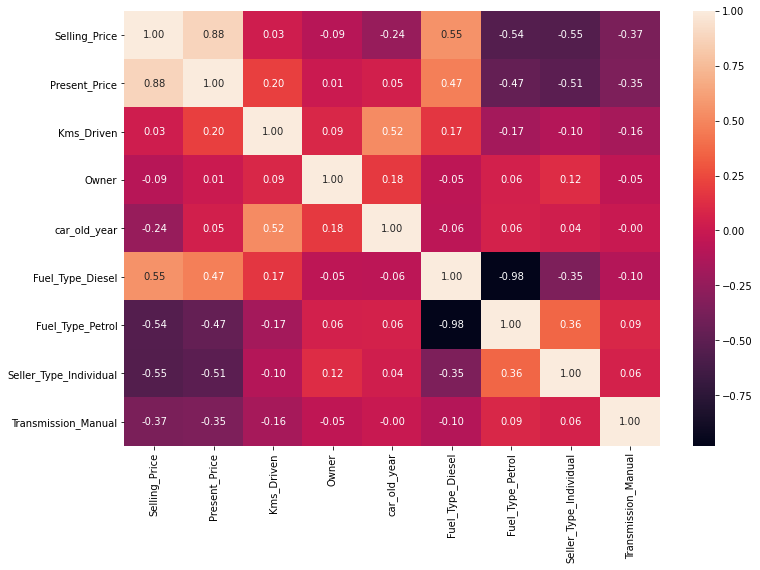

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f")

In [20]:

X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=30, random_state=22)

## **Feature Importance**

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
Feature_imp = ExtraTreesRegressor()
Feature_imp.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(Feature_imp.feature_importances_)

[0.36616328 0.03584902 0.00091509 0.0818606  0.22590549 0.01060537
 0.13106386 0.1476373 ]


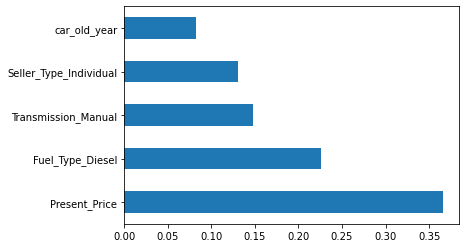

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(Feature_imp.feature_importances_,index =X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Converting dataset into independent and target variable and doing train and test split 

In [24]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=30, random_state=22)

In [25]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=30, random_state=22)

# **Decision Tree Regressor**

In [26]:

DT_Regressor = DecisionTreeRegressor(criterion='mse', max_depth=5)
DT_Regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [27]:
DT_Regressor.score(X_train,y_train)

0.9783538864719713

In [28]:
DT_Regressor.score(X_test,y_test)

0.9152546657791584

In [29]:
DT_Regressor_predict =DT_Regressor.predict(X_test)
# DT_Regressor_accuracy = accuracy_score(y_test,DT_Regressor_pridict)
# DT_Regressor_accuracy
# DT_Regressor_predict

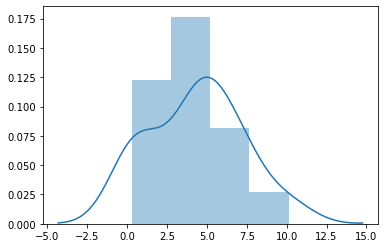

In [30]:
sns.distplot(DT_Regressor_predict)

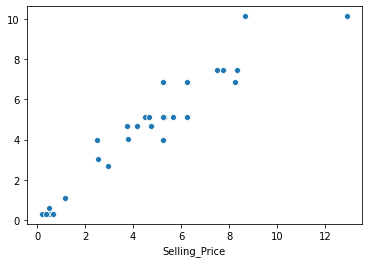

In [31]:
sns.scatterplot(y_test,DT_Regressor_predict)

In [32]:
print("                    RESULT CHART")
result_chart = pd.DataFrame({"Predicted_value":DT_Regressor_predict,"Actuall_value":y_test})
result_chart
 

                    RESULT CHART


,Predicted_value,Actuall_value
111,1.105238,1.15
56,5.137037,4.50
300,5.137037,5.30
254,6.877273,5.25
41,3.053571,2.55
280,5.137037,5.25
90,4.033333,3.80
243,5.137037,6.25
267,7.452273,8.35
151,0.310833,0.50


In [33]:
# # plt.figure(figsize=(12,50))
# result_chart.plot.bar(figsize=(30,12)) 
# # plot between 2 attributes 
# plt.bar(result_chart['Predicted_value'], result_chart['Actuall_value']) 
# # plt.xlabel("Predicted_value") 
# # plt.ylabel("Actuall_value") 
# plt.show()

## **Random Forest Regressor**

In [34]:
# from sklearn.ensemble import RandomForestRegressor
# RF_Regressor = RandomForestRegressor(n_estimators=50,max_depth=6)
# RF_Regressor.fit(X_train,y_train)

In [35]:
# RF_Regressor.score(X_train,y_train)


In [36]:
# RF_Regressor.score(X_test,y_test)

## **Hyperperameter Tuning (Random cv)**







In [37]:
# #Randomized search cv

# # number of tree in random forest
# n_estimators = [int(x) for x in np.linspace(start =100, stop=12000,num=12)]
# n_estimators
# #numkber of feature to be consider it at  every split
# max_features = ['sqrt','mse']
# #maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(4,30,num=6)]
# #minimum number of samples required  to split a node
# min_sample_split = [2,5,10,15,100]
# #minimum number of samples required at each leaf node
# min_sample_leaf = [1,2,5,10]

In [38]:
# from sklearn.model_selection import RandomizedSearchCV

In [39]:
# # creating Random grid
# random_grid = { 'n_estimator': n_estimators,
#                 'max_feature': max_features,
#                 'max_depth': max_depth,
#                 'min_sample_split':min_sample_split,
#                 'min_sample_leaf':min_sample_leaf   
# }
# print(random_grid)

In [40]:
# rf=RandomForestRegressor()

In [41]:

# rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring='neg_mean_squared_error',n_iter=10,cv=5, verbose=2, random_state=42,n_jobs=1)

In [42]:
# rf_random.fit(X_train,y_train)

In [43]:
# rf_clf=RandomForestRegressor(n_estimator=8754, min_sample_split=5, min_sample_leaf=5, max_feature=mse, max_depth=9 )

## Creating Pickel File

In [44]:
import pickle
#open a file , where you want to store the data
file = open('Decision_tree_regression_model.pkl','wb')

# dump information to that file 
pickle.dump(DT_Regressor,file)